In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
#資料預處理

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images, test_images = train_images.reshape(len(train_images), 28, 28, 1), test_images.reshape(len(test_images), 28, 28, 1)

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [3]:
def drawChart(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')

In [4]:
model = models.Sequential([
    layers.Conv2D(16, (5,5), activation="relu", padding="same", input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(36, (5,5), activation="relu", padding="same"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax"),
])

In [5]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, batch_size=300, validation_data=(test_images, test_labels))

Epoch 1/5
200/200 [==============================] - 22s 112ms/step - loss: 1.6506 - accuracy: 0.8244 - val_loss: 1.5041 - val_accuracy: 0.9595
Epoch 2/5
200/200 [==============================] - 23s 113ms/step - loss: 1.5155 - accuracy: 0.9492 - val_loss: 1.4881 - val_accuracy: 0.9736
Epoch 3/5
200/200 [==============================] - 22s 112ms/step - loss: 1.5022 - accuracy: 0.9614 - val_loss: 1.4830 - val_accuracy: 0.9783
Epoch 4/5
200/200 [==============================] - 22s 109ms/step - loss: 1.4949 - accuracy: 0.9679 - val_loss: 1.4793 - val_accuracy: 0.9825
Epoch 5/5
200/200 [==============================] - 22s 109ms/step - loss: 1.4902 - accuracy: 0.9725 - val_loss: 1.4765 - val_accuracy: 0.9852


313/313 [==============================] - 1s 4ms/step - loss: 1.4765 - accuracy: 0.9852


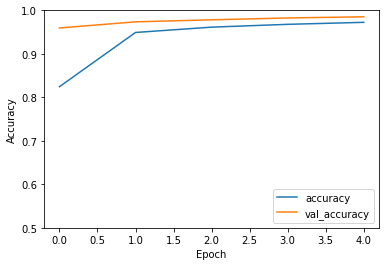

In [6]:
drawChart(history)
test_loss, test_acc = model.evaluate(test_images,  test_labels)

In [7]:
model.save('save/mnist.h5')

In [3]:
#load model and evaluate
loadModel = models.load_model('save/mnist.h5')
loadModel.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
test_loss, test_acc = loadModel.evaluate(test_images,  test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 1.4765 - accuracy: 0.9852
